In [69]:
import pandas as pd

In [70]:
# DATA CLEANING

In [56]:
#Load the Dataset
df = pd.read_csv("train.csv")

In [57]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                      

In [58]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
# check for missing values
df.isnull().sum() # check for missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [60]:
# Age,Cabin,Embarked has missing values

In [61]:
#Handling Missing Values

# Fill missing Age values with the median age
df["Age"].fillna(df["Age"].median(), inplace=True)

# Fill missing Embarked values with the most common value
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Drop the Cabin column due to excessive missing values
df.drop(columns=["Cabin"], inplace=True)

In [62]:
# Verify missing values are handled
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [63]:
print(df.isnull().sum())  # Check missing values in each column

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [64]:
#Convert Categorical Data into Numeric

# Fill missing values in 'Sex' (assuming most missing values are male)
df["Sex"].fillna("male", inplace=True)  

# Fill missing values in 'Embarked' with the most common value
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)  

# Convert categorical data to numeric
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2})

# Verify changes
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [67]:
print("\nMissing values after cleaning:")
print(df.isnull().sum())

print("\nFirst few rows after cleaning:")
df.head()


Missing values after cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

First few rows after cleaning:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [71]:
# Exploratory Data Analysis (EDA)

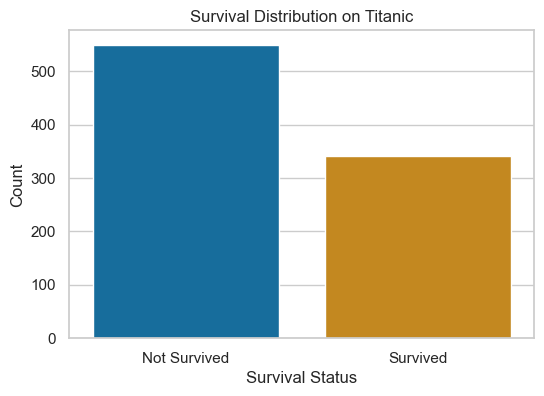

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set(style="whitegrid")

# Mapping
df["Survived_Label"] = df["Survived"].map({0: "Not Survived", 1: "Survived"})

# Plot Survival Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x="Survived_Label", data=df, palette="colorblind")
plt.title("Survival Distribution on Titanic")
plt.xlabel("Survival Status")
plt.ylabel("Count")
plt.show()


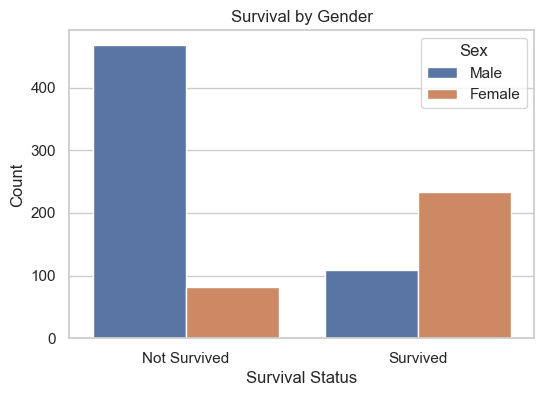

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mapping
df["Survived_Label"] = df["Survived"].map({0: "Not Survived", 1: "Survived"})

# Mapping 
df["Sex_Label"] = df["Sex"].map({0: "Male", 1: "Female"})

# Plot Survival by Gender
plt.figure(figsize=(6, 4))
sns.countplot(x="Survived_Label", hue="Sex_Label", data=df, palette="deep")
plt.title("Survival by Gender")
plt.xlabel("Survival Status")
plt.ylabel("Count")
plt.legend(title="Sex")
plt.show()
# conclusion: More women survived compared to men


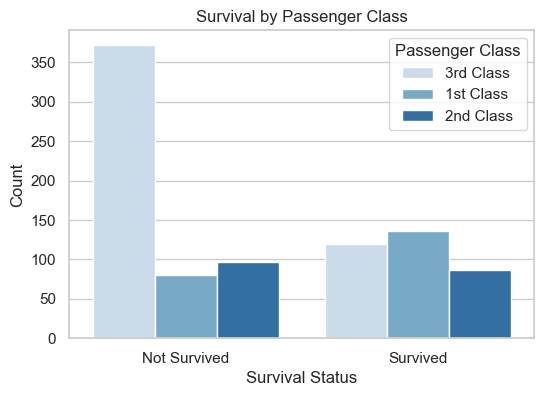

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Map 
df["Survived_Label"] = df["Survived"].map({0: "Not Survived", 1: "Survived"})

# Map 
df["Pclass_Label"] = df["Pclass"].map({1: "1st Class", 2: "2nd Class", 3: "3rd Class"})

# Plot Survival by Passenger Class
plt.figure(figsize=(6, 4))
sns.countplot(x="Survived_Label", hue="Pclass_Label", data=df, palette="Blues")
plt.title("Survival by Passenger Class")
plt.xlabel("Survival Status")
plt.ylabel("Count")
plt.legend(title="Passenger Class")
plt.show()
# conclusion: 1st-class passengers had a higher survival rate than 2nd and 3rd class.


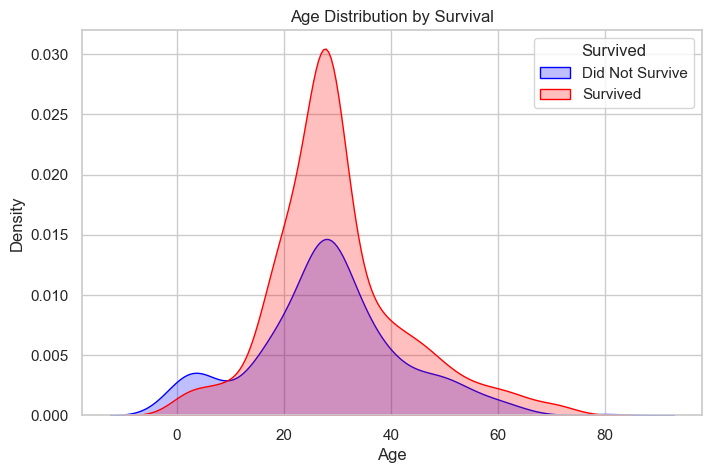

In [94]:
# Plot Age Distribution by Survival
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x="Age", hue="Survived", fill=True, palette={0: "red", 1: "BLUE"})
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend(title="Survived", labels=["Did Not Survive", "Survived"])
plt.show()
# conclusion:Younger passengers (Children) had a higher survival rate


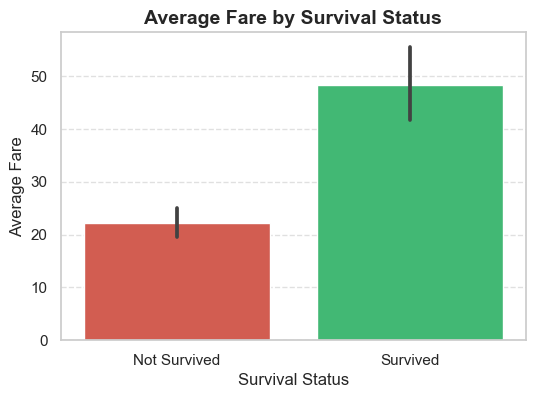

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

df["Survived_Label"] = df["Survived"].map({0: "Not Survived", 1: "Survived"})

# Set figure size
plt.figure(figsize=(6, 4))

# Create a bar plot showing average Fare for Survived vs. Not Survived
sns.barplot(x="Survived_Label", y="Fare", data=df, palette=["#E74C3C", "#2ECC71"])

# Set title and labels
plt.title("Average Fare by Survival Status", fontsize=14, fontweight="bold")
plt.xlabel("Survival Status", fontsize=12)
plt.ylabel("Average Fare", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.6)  # Light grid for readability
plt.show()


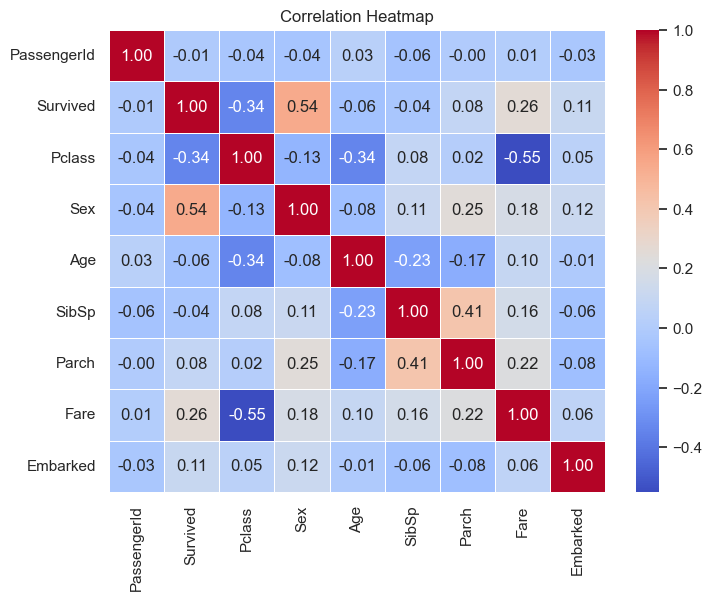

In [95]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Fare and Survival have a strong positive correlation → Higher fares = Higher survival chances.
# Pclass and Survival are negatively correlated → 3rd-class passengers had lower survival rates.
# Sex and Survival are strongly correlated → Females had a higher survival rate.
